## GRIPAUGUST21

## AUTHER : INDUMATHI S

## TASK-1 :  Prediction using Supervised ML

# Introduction:

   The simple linear model is modelled when the model has only two variables where one continuous variable should depend other variable which can be continuous/categorical. The model can be builded using the **linear relationship** between the those two variables. The model is **Y = β0 + β1X + ϵ**. The **supervised learning algorithm** can be used to fit the simple linear regression and predict the future values using the model. Here, the model is builded using training data and accuracy is measured using test data. In this task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied.

# Objective:

   i) To fit the simple linear model for predicting score based on number hours studied using supervisied learning algorithm for simple linear regression.
   
   ii) To predict the score of a student if that student studies for 9.25 hrs/ day.
   
   iii) To check the accuracy measure of the model.
   

# Analysis

## Importing the required packages and dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Importing the dataset

print("Data imported successfully")
df = pd.read_csv("GRIP data.csv")
df.head()

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


## Explotary Data Analysis

In [6]:
# Dimension of dataset

print("The number of observations and variables of the dataset are ",df.shape)

The number of observations and variables of the dataset are  (25, 2)


In [5]:
# Checking the datatype and missing values

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 480.0 bytes


The missing values cannot be found in the dataset. The datatype of the hours is float and scores is integer. Since both variables are continuous, we can proceed further.

In [6]:
# Descriptive summary of the dataset

df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


The average study hours of the students is 5.01200 and the average score of the students is 51.48%

In [9]:
# Input variables
x = df.iloc[:, :-1].values 

# Output variables
y = df.iloc[:, 1].values

### Scatter plot for independent and dependent variable

Text(0,0.5,'Scores')

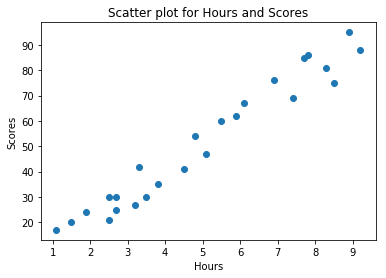

In [12]:
plt.scatter(x,y)
plt.title("Scatter plot for Hours and Scores")
plt.xlabel("Hours")
plt.ylabel("Scores")

The plot shows that the data points are **positively correlated**. Hence, there is a positive linear relationship between number hours studied and the scores of the students. The scores of the students is depending on the number of hours studied. Therefore, **no of hours studied is independent variable and score obtained is dependent variable**.

### Correlation matrix between independent and dependent variable

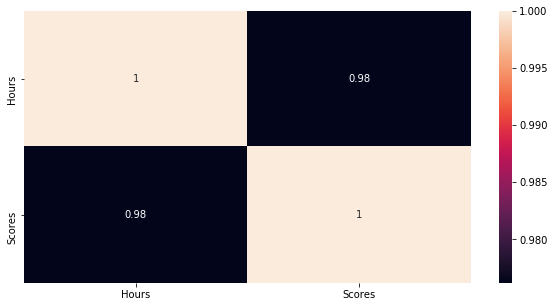

In [13]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True  )
plt.show()

We have obtained the **correlation is 0.98** which implies there exist a **strong positive correlation** between hours of studied and scores of students.

C:\Users\Pooja\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0.5,1,'Box plot for hours')]

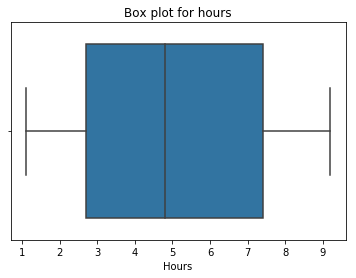

In [4]:
# Box plot for independent variable

box1=sns.boxplot("Hours",data=df)
box1.set(title='Box plot for hours')

 The middle 50% of the student's study hours lie between 2.7 to 7.4 which is positive sign of the students towards studying. The minimum and maximum study hours of the students are 1.1 and 9.2 respectively. Here, the length of the both whiskers are equal. So, the distribution of the hours studied is symmetric.

### Box plot

C:\Users\Pooja\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0.5,1,'Box plot for scores')]

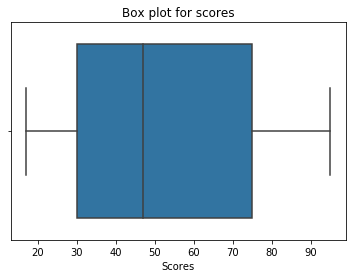

In [5]:
# Box plot for dependent variable

box1=sns.boxplot("Scores",data=df)
box1.set(title='Box plot for scores')

The middle 50% of the student's study hours lie between 30 to 75 which tells that most of the students scores less percentage. Only 25% students scores above 75. The minimum and maximum study hours of the students are 17 and 95 respectively. The 25% of the students failed in exam. 

## Data Preparation

In [7]:
# Importing the package for splitting and the train and test dataset

from sklearn.model_selection import train_test_split

In [10]:
from sklearn.model_selection import train_test_split  
X_train, X_test, Y_train, Y_test = train_test_split(x, y, 
                            test_size=0.2, random_state=0) 

The training and testing datasets have been divided into a 80% and 20% ratio respectively using train_test_split function.

## Training the Algorithm

In [53]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
model = regressor.fit(X_train,Y_train) 

print("Training complete.\n")

print("The estimates of the parameters are:")
print("The regression coefficient of the model is",regressor.coef_)
print("The constant value of the model is",regressor.intercept_)

Training complete.

The estimates of the parameters are:
The regression coefficient of the model is [9.91065648]
The constant value of the model is 2.018160041434669


### Interpretation of Regression coefficient and Constant term:
We have obtained the constant (beta_0) and regression coefficient (beta_1) and the respective values are 2.01816 and 9.91065648.
**The fitted model is estimated Scores = 2.01816004 + 9.91065648*Hours.**

The sign of the regression coefficient is positive which implies there is a positive correlation between hours studied and scores of the student and also The coefficient tells that for each one unit of hours studied to be increased we can expect the scores to be increase by an average of 9.91065648. That is, the scores of the student is increased by 9.91065648 for a unit of study hour to be increased.

## Visualizing the fitted line to train dataset

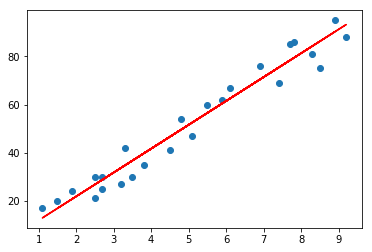

In [62]:
# Plotting the regression line
line = regressor.coef_*x+regressor.intercept_

# Plotting for the test data
plt.scatter(x, y)
plt.plot(x, line,'r');
plt.show()

The redline is the fitted regression line (Scores = 9.91065648 + 2.01816004*Hours) for training data. We can see that the data points are closer to the regression line.

# Prediction

In [58]:
y_pred = regressor.predict(X_test) # Predicting the scores

In [57]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': Y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [63]:
hours = 9.25
own_pred = regressor.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737538


 The model predicts **the score of the student who studies 9.25 hours per day is 93.69%**

# Evaluating the model
The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.


In [70]:
from sklearn.metrics import r2_score
r=r2_score(Y_test,y_pred)
print("The r2 score of the model is",r)

The r2 score of the model is 0.9454906892105355


The model predicts the scores of the students with 94.5% accuracy

# Conclusion:

  The student who studies for 9.25 hours per day will score 93.69 percentage of marks with 94.5% accuracy.

### THANK YOU!